# Parcial 1 
Juan Camilo Cuenca S - Diego alexander Jimenez
## Cargar el dataset y borrar datos nulos

In [2]:
import pandas as pd

# 1. Cargar el dataset

df = pd.read_csv('vgchartz-2024.csv')

# 2. Mostrar información inicial

print("=== Encabezado del Dataset ===")
print(df.head())
print("\n=== Información del Dataset ===")
print(df.info())
print("\n=== Dimensiones del Dataset ===")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
print("\n=== Valores faltantes (antes de limpieza) ===")
print(df.isnull().sum())


# 3. Eliminar columnas innecesarias

# Nos quedamos solo con las columnas útiles para el análisis
columns_to_keep = [
    'title', 'console', 'genre', 'publisher', 'developer', 
    'critic_score', 'total_sales', 'na_sales', 'jp_sales', 
    'pal_sales', 'other_sales', 'release_date'
]
df = df[columns_to_keep]

print("\n=== Dataset después de eliminar columnas innecesarias ===")
print(df.head())
print(f"Columnas actuales: {list(df.columns)}")

# 4. Eliminar filas con valores nulos

df_cleaned = df.dropna()
print(f"\n=== Después de eliminar los valores faltantes: {df_cleaned.shape[0]} filas ===")
print("\n=== Verificación de nulos ===")
print(df_cleaned.isnull().sum())


=== Encabezado del Dataset ===
                                             img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Auto V   
4  /games/boxart/full_4990510AmericaFrontccc.jpg    Call of Duty: Black Ops 3   

  console    genre       publisher       developer  critic_score  total_sales  \
0     PS3   Action  Rockstar Games  Rockstar North           9.4        20.32   
1     PS4   Action  Rockstar Games  Rockstar North           9.7        19.39   
2     PS2   Action  Rockstar Games  Rockstar North           9.6        16.15   
3    X360   Action  Rockstar Games  Rockstar North           NaN        15.86   
4     PS4  Shooter      Activision        Treyarch           8.1        15.09

# Preguntas

- ¿Cuáles son los 10 videojuegos más vendidos globalmente?
  
- ¿Cómo ha evolucionado la industria de los videojuegos por año según las ventas?
  
- ¿Cuáles son los géneros más populares y cómo se distribuyen sus ventas?
  
- ¿Qué plataformas tienen más juegos en el top de ventas?
  
- ¿Existe una relación entre la puntuación de los críticos y las ventas totales?

## ¿Cuáles son los 10 videojuegos más vendidos globalmente?

C:\Users\camil\AppData\Local\Temp\ipykernel_14296\957657344.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='total_sales', y='title', data=top_10, errorbar=None,  palette='viridis')


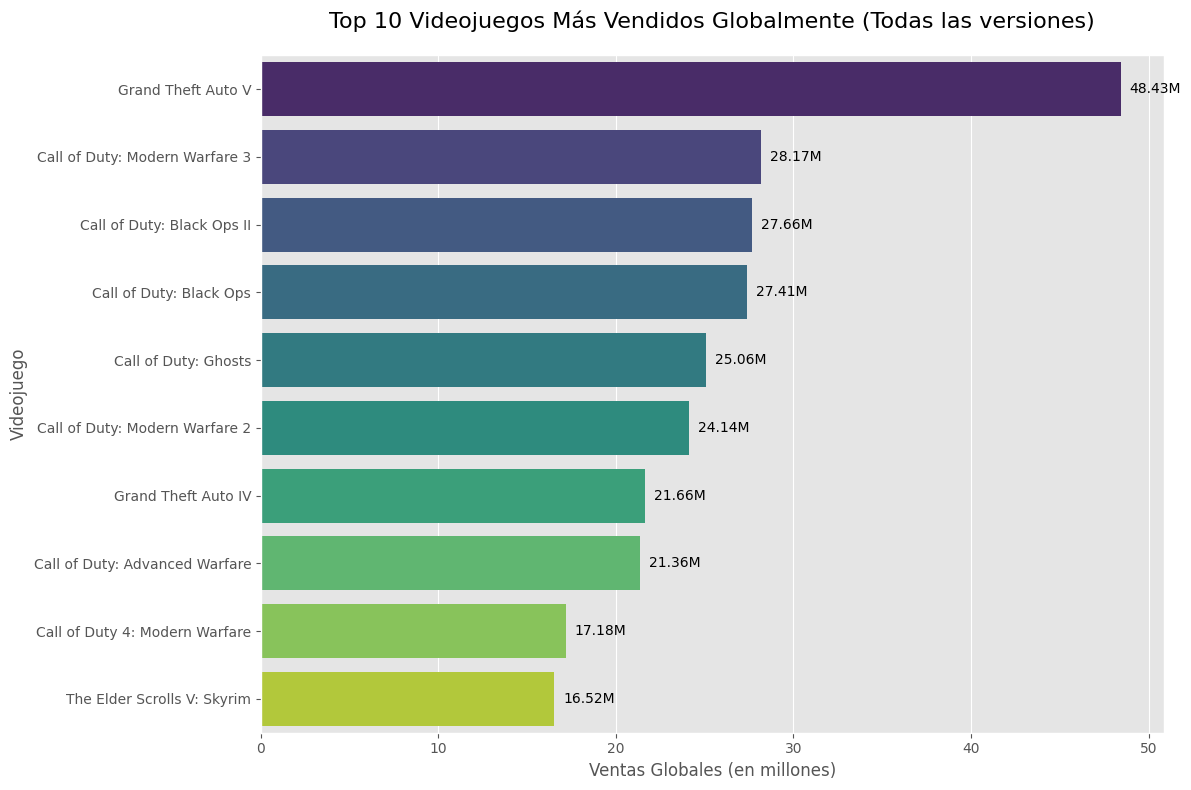

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# ================================
# 4. Top 10 videojuegos más vendidos
# ================================
# Configuración del estilo
plt.style.use('ggplot')

# Agrupar por título del juego y sumar las ventas
game_sales = df_cleaned.groupby('title')['total_sales'].sum().reset_index()

# Ordenar por ventas totales y tomar los 10 primeros
top_10 = game_sales.sort_values('total_sales', ascending=False).head(10).reset_index(drop=True)

# Crear la figura
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras horizontales
ax = sns.barplot(x='total_sales', y='title', data=top_10, errorbar=None,  palette='viridis')

# Añadir etiquetas
for i, v in enumerate(top_10['total_sales']):
    ax.text(v + 0.5, i, f'{v:.2f}M', va='center')

# Personalizar títulos y ejes
plt.title('Top 10 Videojuegos Más Vendidos Globalmente (Todas las versiones)', fontsize=16, pad=20)
plt.xlabel('Ventas Globales (en millones)', fontsize=12)
plt.ylabel('Videojuego', fontsize=12)

# Ajustar el diseño
plt.tight_layout()

# Guardar el gráfico
plt.savefig('Graficos/top10_videojuegos_vendidos.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()


## ¿Cómo ha evolucionado la industria de los videojuegos por año según las ventas?

C:\Users\camil\AppData\Local\Temp\ipykernel_14296\2626536288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'])
C:\Users\camil\AppData\Local\Temp\ipykernel_14296\2626536288.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['release_year'] = df_cleaned['release_date'].dt.year


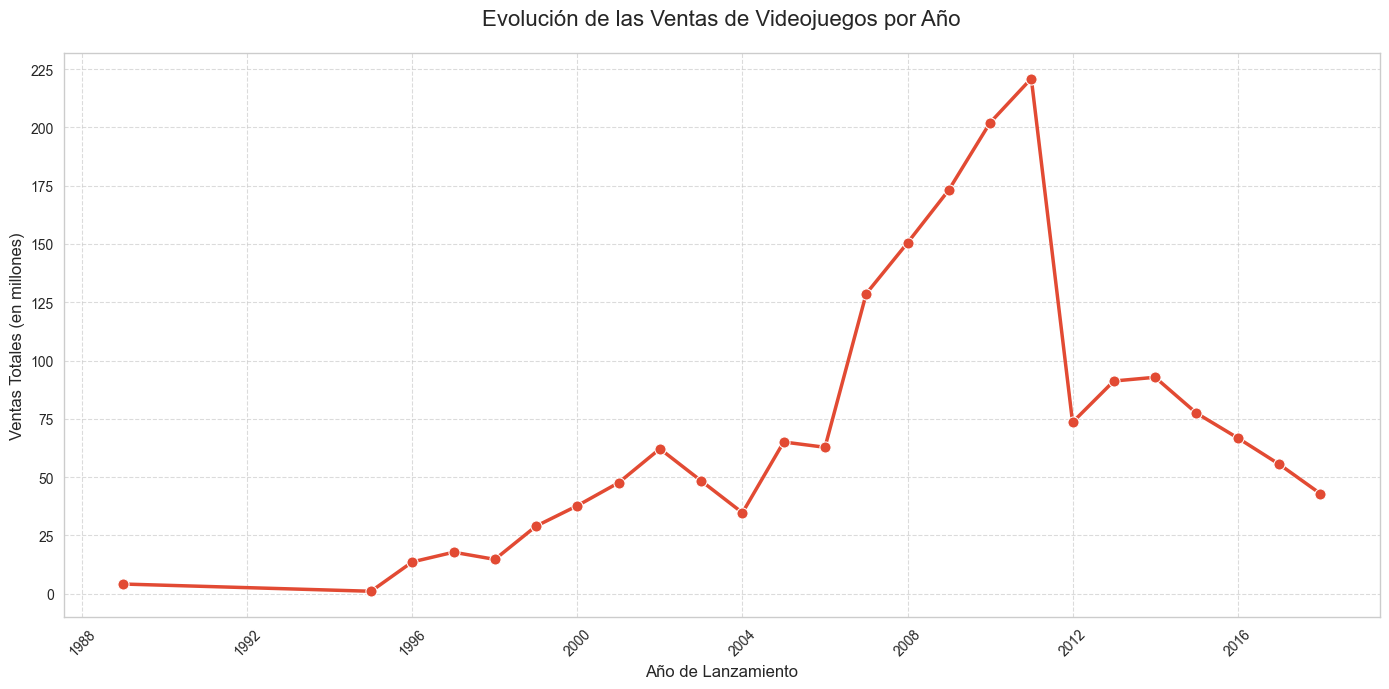

Gráfico guardado como 'Graficos/evolucion_ventas_anuales.png'

Ventas Totales por Año (últimos 10 años):
    release_year  total_sales
24          2018        42.98
23          2017        55.62
22          2016        66.84
21          2015        77.49
20          2014        92.83
19          2013        91.22
18          2012        73.54
17          2011       220.94
16          2010       201.97
15          2009       173.12


In [17]:
# 1. Asegurarse de que la columna release_date sea datetime
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'])

# 2. Extraer el año de lanzamiento si no existe
if 'release_year' not in df_cleaned.columns:
    df_cleaned['release_year'] = df_cleaned['release_date'].dt.year

# 3. Calcular ventas totales por año
yearly_sales = df_cleaned.groupby('release_year')['total_sales'].sum().reset_index()

# 4. Configurar el estilo de seaborn
sns.set_style("whitegrid")

# 5. Crear y guardar el gráfico de evolución de ventas
plt.figure(figsize=(14, 7))
sns.lineplot(x='release_year', y='total_sales', data=yearly_sales, 
             marker='o', linewidth=2.5, markersize=8)

# 6. Personalización del gráfico
plt.title('Evolución de las Ventas de Videojuegos por Año', fontsize=16, pad=20)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Ventas Totales (en millones)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# 7. Asegurar que los años se muestren como enteros
from matplotlib.ticker import MaxNLocator
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))
plt.xticks(rotation=45)

# 8. Crear carpeta si no existe
import os
os.makedirs('Graficos', exist_ok=True)

# 9. Guardar el gráfico
plt.tight_layout()
plt.savefig('Graficos/evolucion_ventas_anuales.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("Gráfico guardado como 'Graficos/evolucion_ventas_anuales.png'")

# 10. Mostrar tabla de los últimos 10 años
print("\nVentas Totales por Año (últimos 10 años):")
print(yearly_sales.sort_values('release_year', ascending=False).head(10).round(2))

## ¿Cuáles son los géneros más populares y cómo se distribuyen sus ventas?

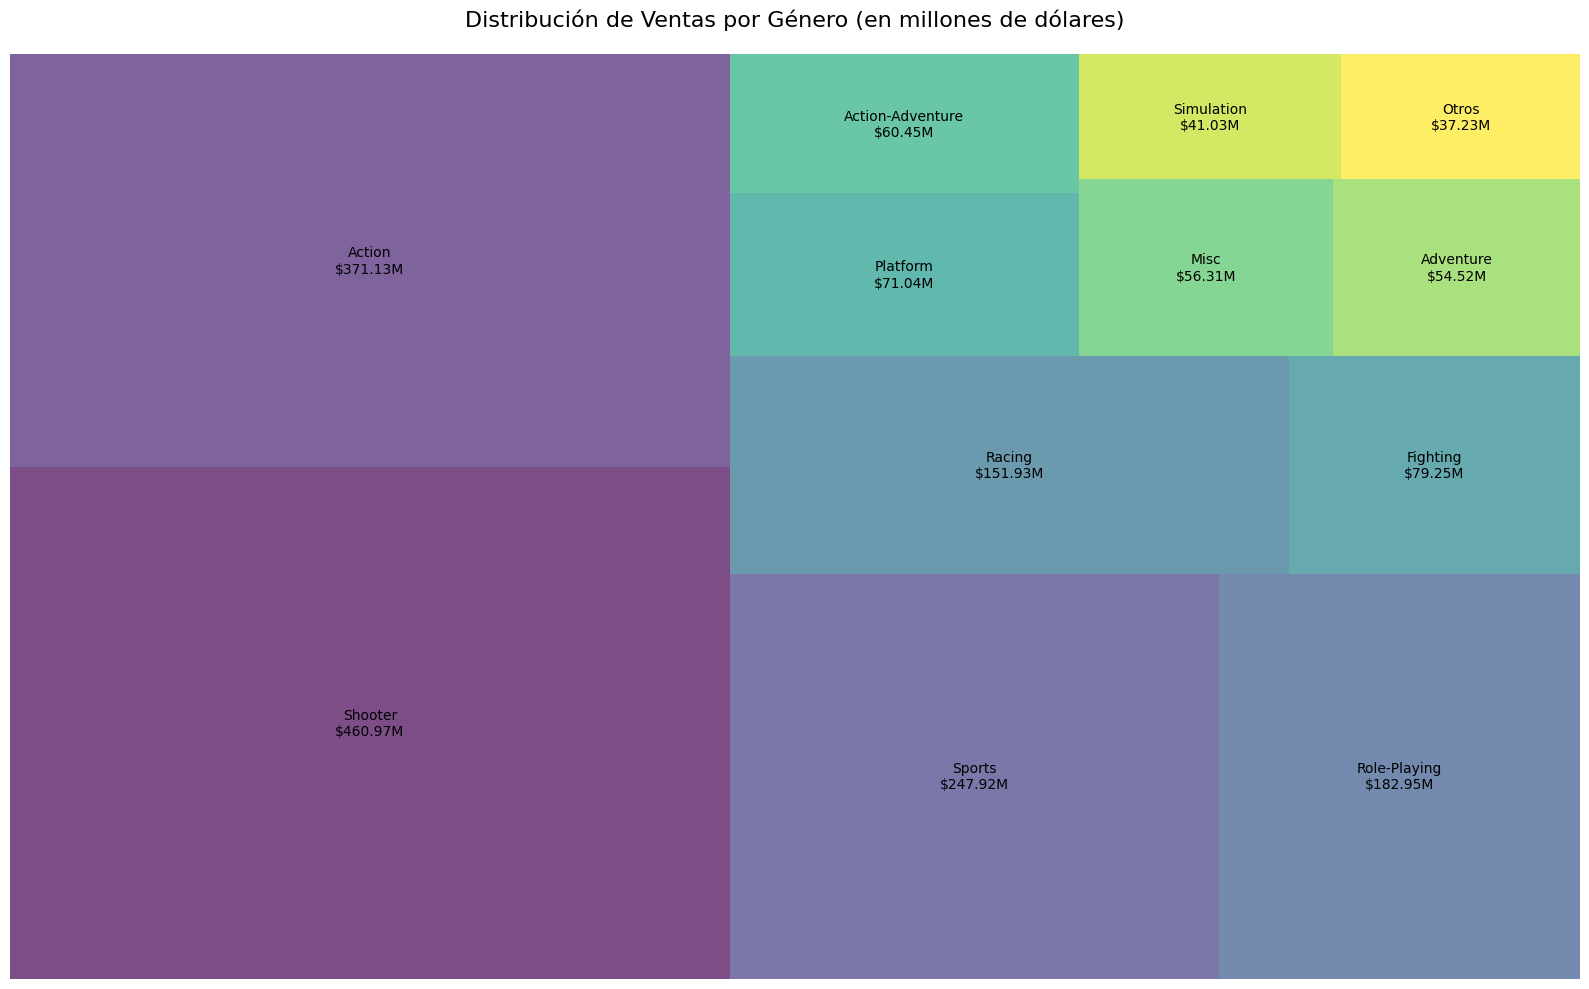

Gráfico guardado como 'Graficos/treemap_ventas_generos_agrupado.png'

Ventas totales por género (en millones):
genre
Shooter             460.97
Action              371.13
Sports              247.92
Role-Playing        182.95
Racing              151.93
Fighting             79.25
Platform             71.04
Action-Adventure     60.45
Misc                 56.31
Adventure            54.52
Simulation           41.03
Otros                37.23
Name: total_sales, dtype: float64


In [16]:
# 1. Calcular las ventas totales por género
genre_sales = df_cleaned.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# 2. Calcular porcentajes
total_sales = genre_sales.sum()
percentages = (genre_sales / total_sales) * 100

# 3. Identificar categorías menores al 2%
mask = percentages < 2
others_sales = genre_sales[mask].sum()

# 4. Crear nueva serie con la categoría "Otros"
if others_sales > 0:
    genre_sales = genre_sales[~mask].copy()
    genre_sales['Otros'] = others_sales

# 5. Ordenar de mayor a menor
genre_sales = genre_sales.sort_values(ascending=False)

# 6. Crear carpeta si no existe
import os
os.makedirs('Graficos', exist_ok=True)

# 7. Configurar la figura para el treemap
plt.figure(figsize=(16, 10))

# 8. Importar squarify si no está importado
import squarify
import numpy as np

# 9. Crear el treemap
colors = plt.cm.viridis(np.linspace(0, 1, len(genre_sales)))
squarify.plot(sizes=genre_sales.values,
              label=[f'{label}\n${value:,.2f}M' for label, value in zip(genre_sales.index, genre_sales.values)],
              color=colors,
              alpha=0.7,
              text_kwargs={'fontsize':10})

# 10. Añadir título y formato
plt.title('Distribución de Ventas por Género (en millones de dólares)', fontsize=16, pad=20)
plt.axis('off')
plt.tight_layout()

# 11. Guardar el gráfico
plt.savefig('Graficos/treemap_ventas_generos.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("Gráfico guardado como 'Graficos/treemap_ventas_generos_agrupado.png'")

# Mostrar tabla con los datos
print("\nVentas totales por género (en millones):")
print(genre_sales.round(2))

## ¿Qué plataformas tienen más juegos en el top de ventas?

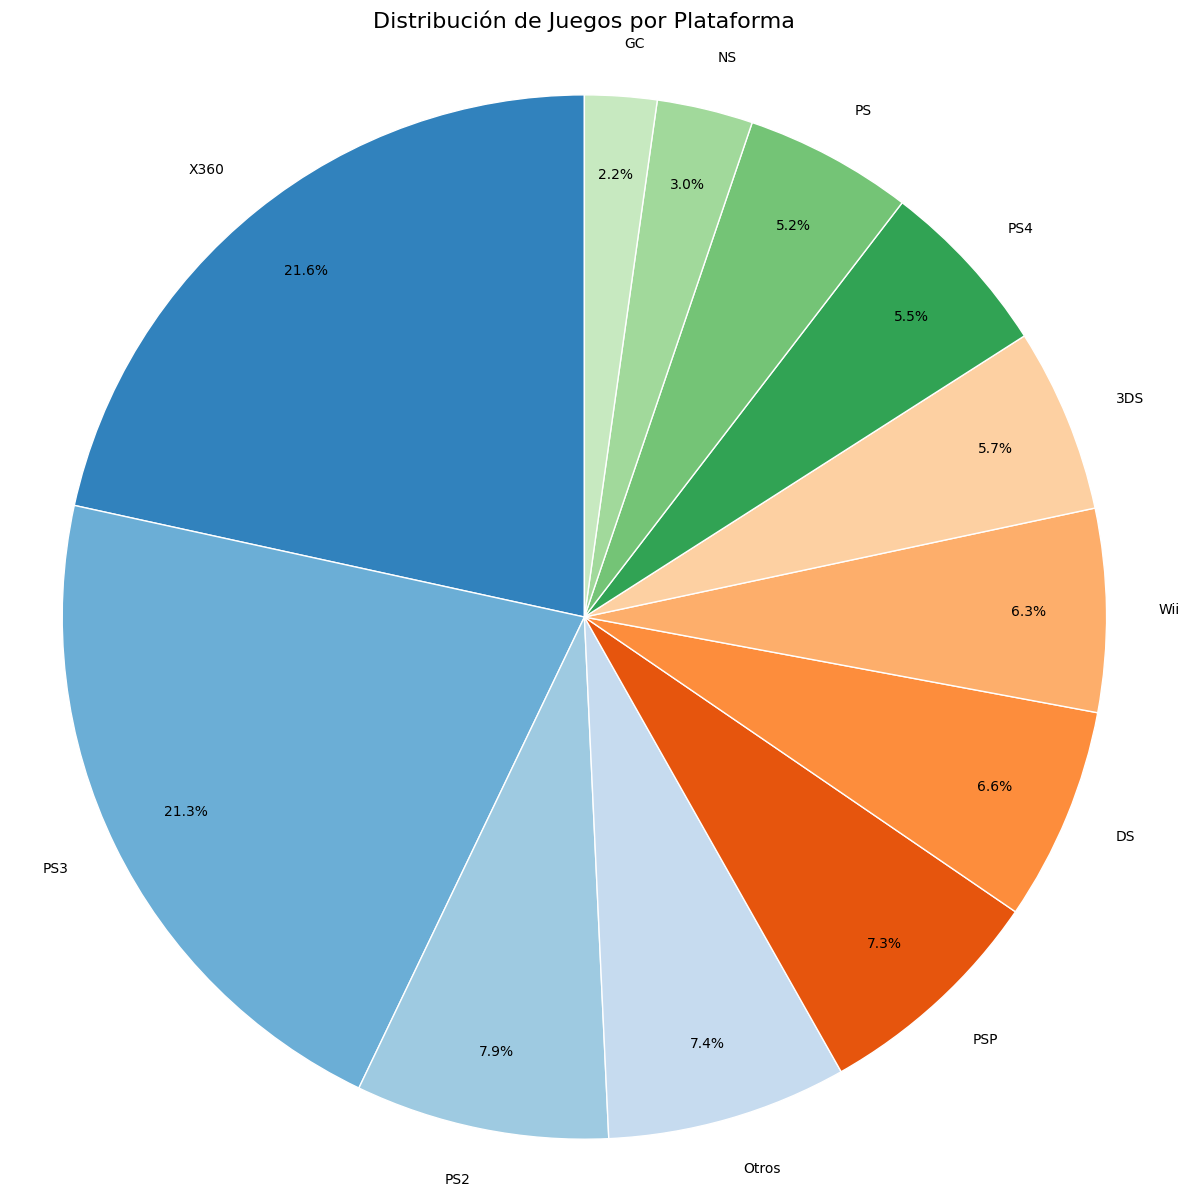

Gráfico guardado como 'Graficos/pie_plataformas_agrupado.png'

Cantidad de juegos por plataforma en el top de ventas:
console
X360     261
PS3      258
PS2       95
Otros     90
PSP       88
DS        80
Wii       76
3DS       69
PS4       67
PS        63
NS        36
GC        27
Name: count, dtype: int64


In [13]:
# 1. Crear el conteo de juegos por plataforma
platform_counts = df_cleaned['console'].value_counts()

# 2. Calcular porcentajes
total = platform_counts.sum()
percentages = (platform_counts / total) * 100

# 3. Identificar categorías menores al 2%
mask = percentages < 2
others_count = platform_counts[mask].sum()

# 4. Crear nueva serie con la categoría "Otros"
if others_count > 0:
    platform_counts = platform_counts[~mask].copy()
    platform_counts['Otros'] = others_count

# 5. Ordenar de mayor a menor
platform_counts = platform_counts.sort_values(ascending=False)

# 6. Crear carpeta si no existe
os.makedirs('Graficos', exist_ok=True)

# 7. Configurar la figura para el gráfico de pastel
plt.figure(figsize=(12, 12))

# 8. Crear el gráfico de pastel
plt.pie(platform_counts, 
        labels=platform_counts.index, 
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab20c.colors[:len(platform_counts)],
        wedgeprops={'edgecolor': 'white', 'linewidth': 1},
        textprops={'fontsize': 10},
        pctdistance=0.85)

# 9. Añadir título y formato
plt.title('Distribución de Juegos por Plataforma', fontsize=16, pad=20)
plt.axis('equal')
plt.tight_layout()

# 10. Guardar el gráfico
plt.savefig('Graficos/pie_plataformas_top10.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print("Gráfico guardado como 'Graficos/pie_plataformas_agrupado.png'")

# Mostrar tabla con los datos
print("\nCantidad de juegos por plataforma en el top de ventas:")
print(platform_counts)

## ¿Existe una relación entre la puntuación de los críticos y las ventas totales?

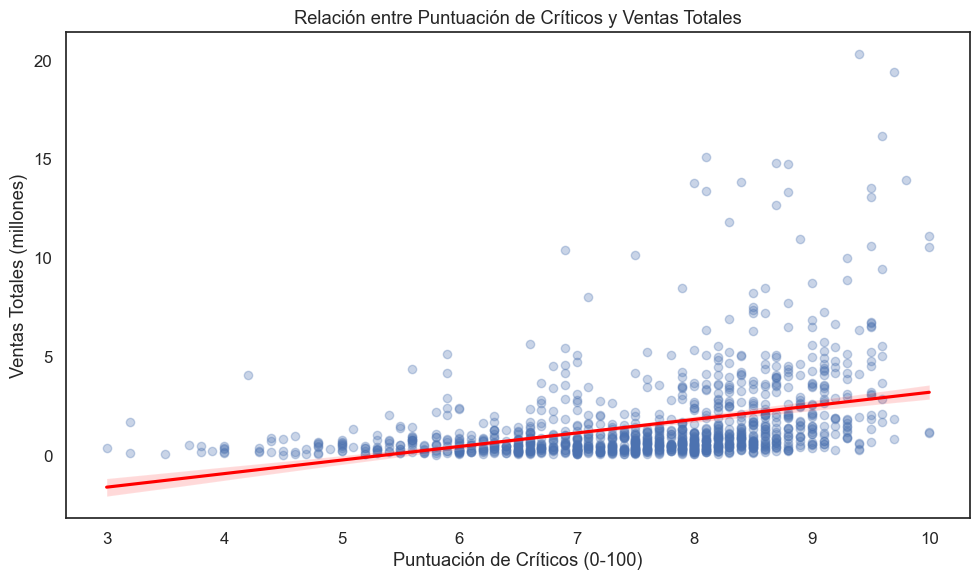

In [ ]:

plt.figure(figsize=(10, 6))


sns.regplot(
    x='critic_score', 
    y='total_sales', 
    data=df_cleaned, 
    scatter_kws={'alpha':0.3}, 
    line_kws={'color':'red'}
)

# Añadir un título descriptivo al gráfico
plt.title('Relación entre Puntuación de Críticos y Ventas Totales')

# Etiqueta del eje X
plt.xlabel('Puntuación de Críticos (0-100)')

# Etiqueta del eje Y
plt.ylabel('Ventas Totales (millones)')

# Ajustar los márgenes del gráfico para que no se solapen los textos
plt.tight_layout()

# Guardar el gráfico como imagen en la carpeta "Graficos"

plt.savefig('Graficos/relacion_calificaciones_ventas.png', dpi=300, bbox_inches='tight')
plt.show()
